In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings

In [2]:
# Load polygon data 
file_path = "sensorRLS10.geojson"  
gdf = gpd.read_file(file_path)

print("Basic Info:")
print(gdf.info())

# Check for missing values
missing_values = gdf.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(gdf.describe())

Basic Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                96 non-null     int32         
 1   geom                              96 non-null     object        
 2   db_id                             96 non-null     object        
 3   model_type                        96 non-null     object        
 4   time                              96 non-null     datetime64[ms]
 5   longitude                         96 non-null     float64       
 6   type                              96 non-null     object        
 7   device_alias                      96 non-null     object        
 8   db_urn                            96 non-null     object        
 9   sensor_type_id                    96 non-null     object        
 10  latitude                        

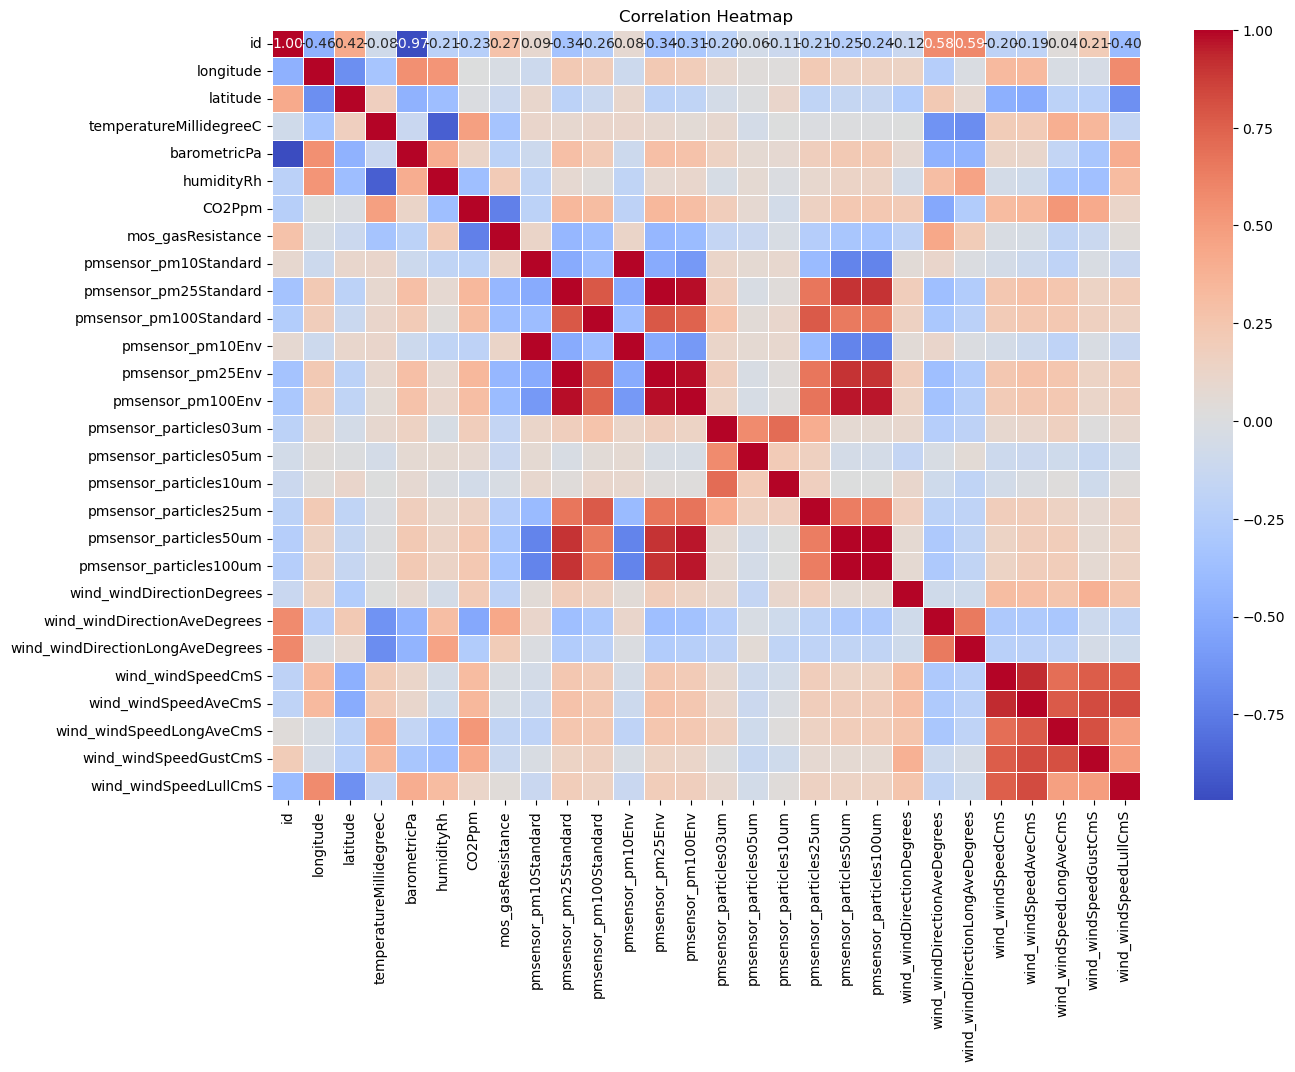

In [3]:
# Plot distribution of selected numerical columns
numeric_columns = gdf.select_dtypes(include=['int32', 'float64']).columns

# Correlation heatmap for numerical columns
plt.figure(figsize=(14, 10))
sns.heatmap(gdf[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


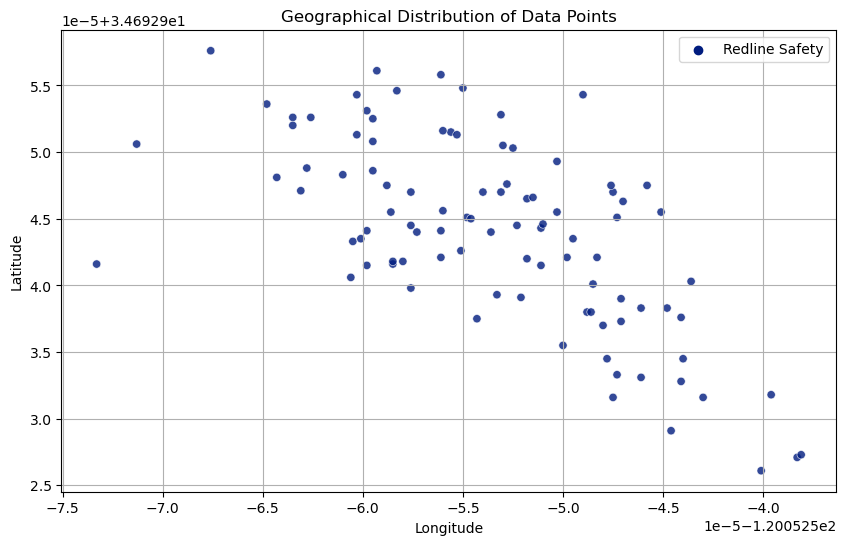

In [4]:
# Scatter plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdf["longitude"], y=gdf["latitude"], hue=gdf["provider"], palette="dark", alpha=0.8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Data Points")
plt.legend()
plt.grid()
plt.show()

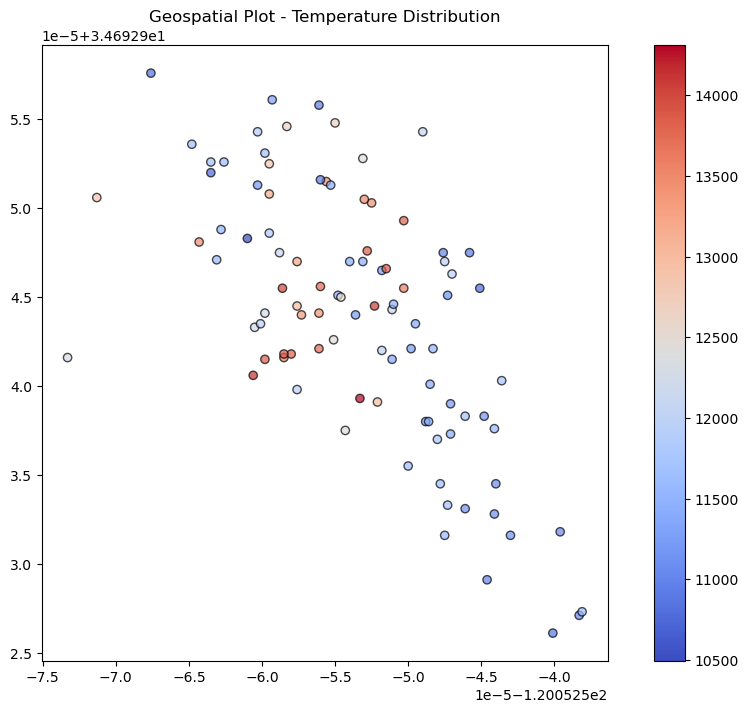

In [5]:
# Geospatial plot using geopandas
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column="temperatureMillidegreeC", cmap="coolwarm", legend=True, alpha=0.7, edgecolor="black")
plt.title("Geospatial Plot - Temperature Distribution")
plt.show()

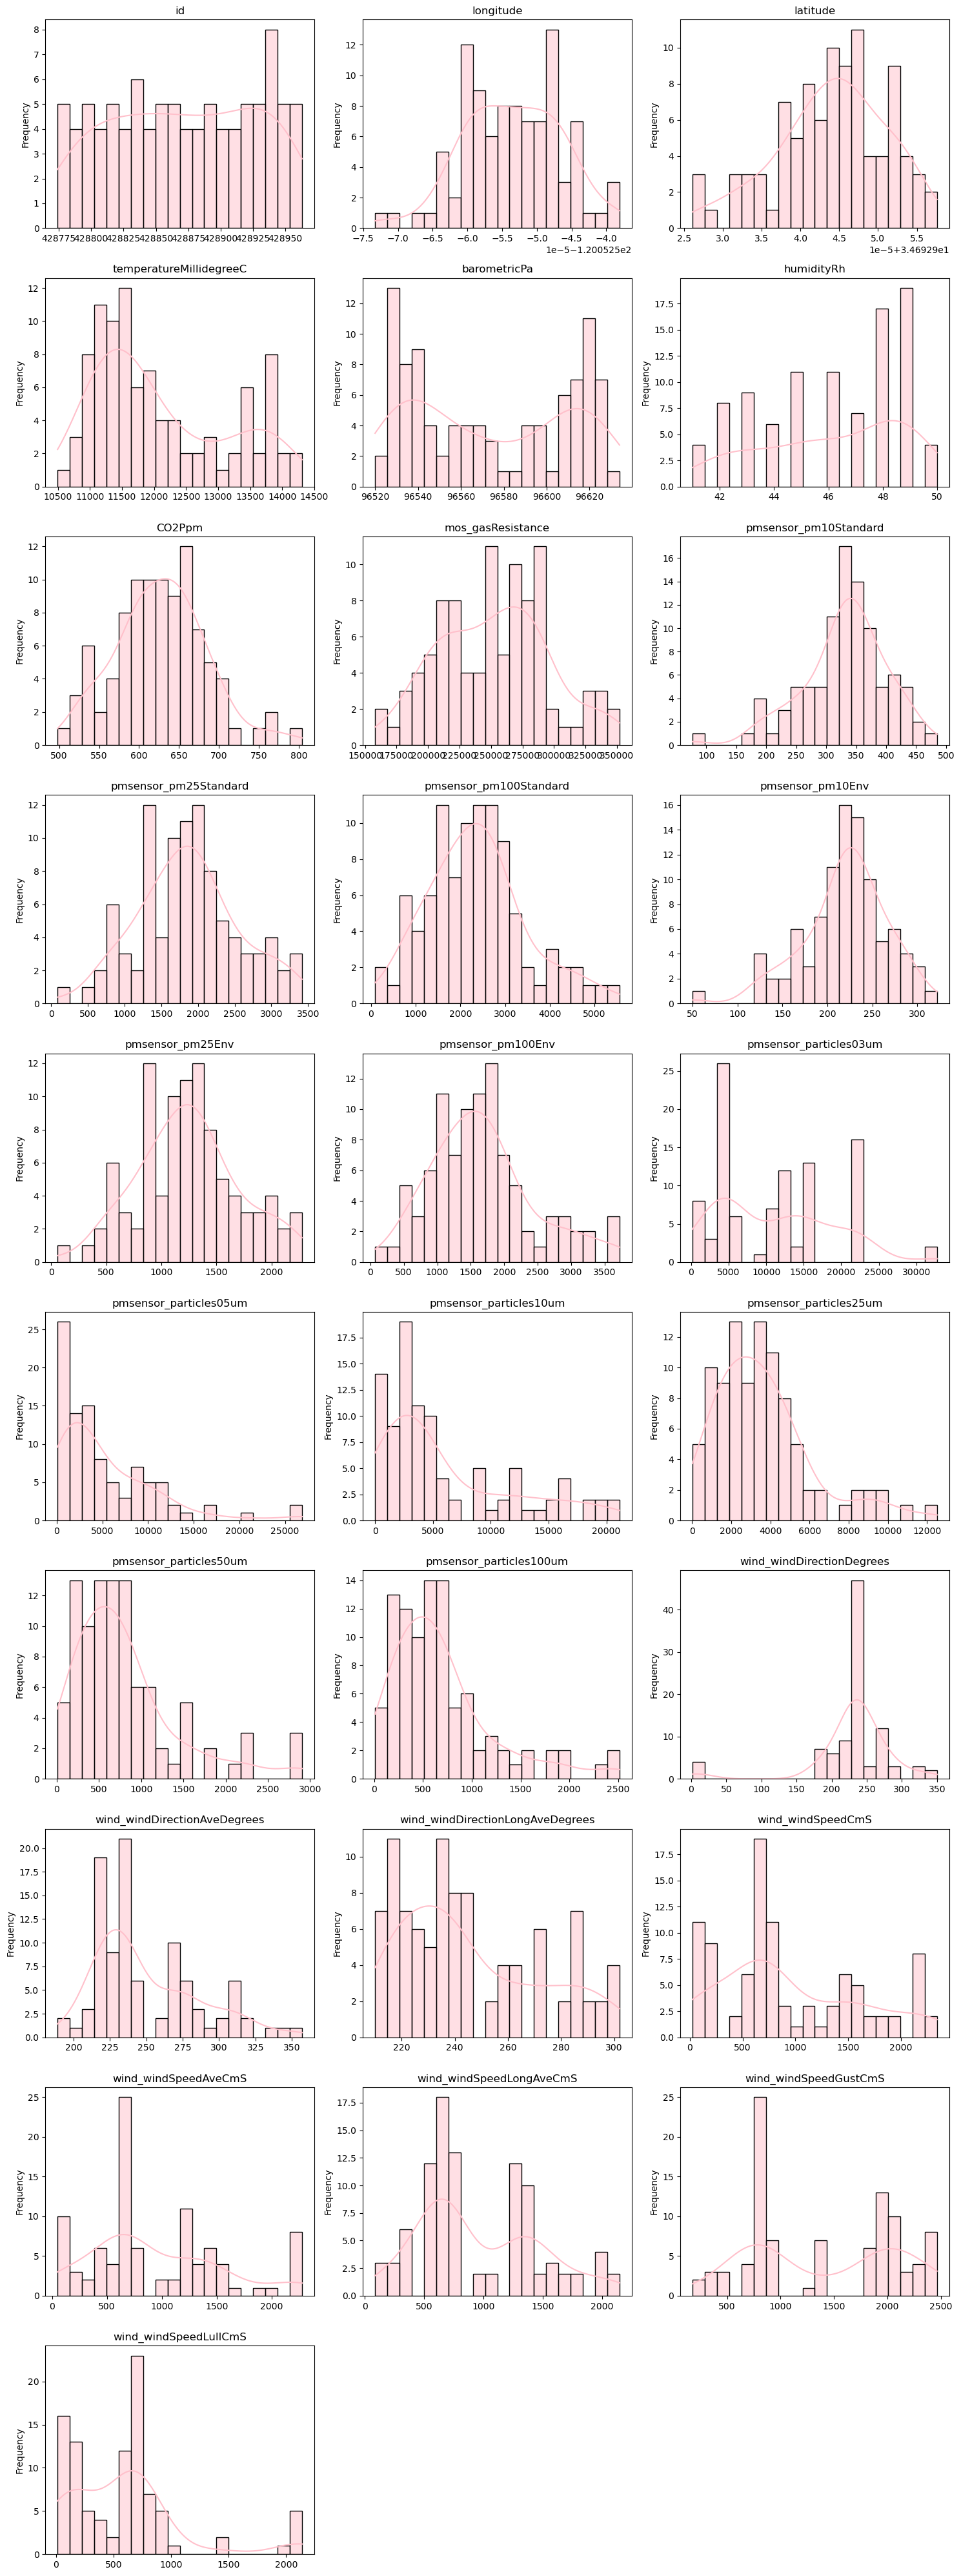

In [6]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert infinite values to NaN before running EDA
gdf.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select numerical columns
numeric_columns = gdf.select_dtypes(include=['int32', 'float64']).columns

# Define the number of rows and columns for subplots
num_features = len(numeric_columns)
num_cols = 3  # Number of columns per row
num_rows = math.ceil(num_features / num_cols)  

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  

# Plot each numeric column separately
for i, col in enumerate(numeric_columns):
    sns.histplot(gdf[col], bins=20, kde=True, ax=axes[i], color="pink", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
